In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
#Load the data
df=pd.read_csv("C:/Users/aarsh/Downloads/Fraud.csv")

In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
#Information about missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#Display firt 10 rows 
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


##DATA CLEANING-It includes  missing values, outliers and multi-collinearity.

In [7]:
#Count missing values in each column

missing_values_count = df.isnull().sum()

# Print missing values count
print(missing_values_count)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


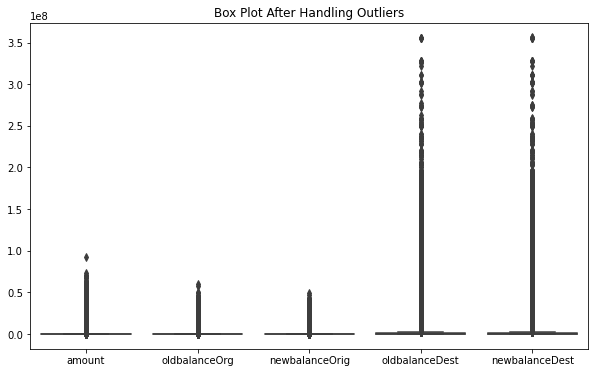

In [10]:
# Visualization before handling outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Box Plot After Handling Outliers')
plt.show()

In [12]:
# Calculate Z-scores for the relevant columns
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]))

# Define a threshold for outlier detection
threshold = 3

# Mark outliers
df['is_outlier'] = (z_scores > threshold).any(axis=1).astype(int)

In [13]:
# Remove rows where 'is_outlier' is 1
df_outliers = df[df['is_outlier'] == 0]

# Drop the 'is_outlier' column if no longer needed
df_outliers.drop(columns=['is_outlier'], inplace=True)


C:\Users\aarsh\AppData\Local\Temp\ipykernel_3804\3131347058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers.drop(columns=['is_outlier'], inplace=True)


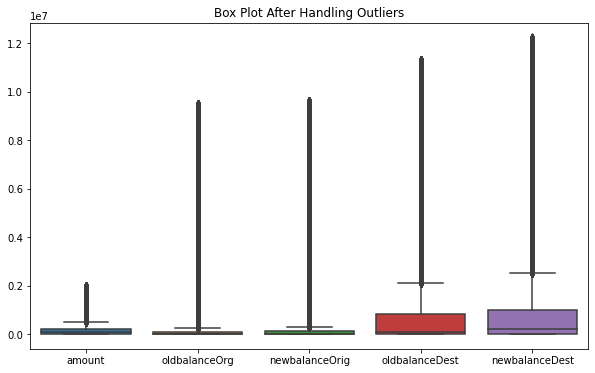

In [15]:
# Visualization before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_outliers[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Box Plot After Handling Outliers')
plt.show()

In [18]:
# Check for non-numeric columns
non_numeric_cols = df_outliers.select_dtypes(include=['object']).columns
print("Non-numeric columns in X:", non_numeric_cols)


Non-numeric columns in X: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [23]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in non_numeric_cols:
    df_outliers[feat] = le.fit_transform(df_outliers[feat].astype(str))

print (df_outliers.info())

C:\Users\aarsh\AppData\Local\Temp\ipykernel_3804\1218596958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[feat] = le.fit_transform(df_outliers[feat].astype(str))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6090589 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 487.9 MB
None


In [24]:
df_outliers.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,725330,170136.0,160296.36,1656904,0.0,0.0,0,0
1,1,3,1864.28,2095592,21249.0,19384.72,1728733,0.0,0.0,0,0
2,1,4,181.00,959093,181.0,0.00,435674,0.0,0.0,1,0
3,1,1,181.00,5579432,181.0,0.00,388106,21182.0,0.0,1,0
4,1,3,11668.14,3299219,41554.0,29885.86,823736,0.0,0.0,0,0


In [26]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df_outliers)

,variables,VIF
0,step,2.897949
1,type,5.762331
2,amount,4.024201
3,nameOrig,2.900771
4,oldbalanceOrg,409.771657
5,newbalanceOrig,425.788504
6,nameDest,4.210327
7,oldbalanceDest,128.057029
8,newbalanceDest,140.298582
9,isFraud,1.056733


In [28]:
# Remove features with high VIF
def remove_high_vif_features(df, vif_threshold=10):
    vif_df = calc_vif(df)
    while vif_df['VIF'].max() > vif_threshold:
        remove = vif_df.sort_values('VIF', ascending=False).iloc[0]['variables']
        df = df.drop(columns=[remove])
        vif_df = calc_vif(df)
    return df

# Handle multicollinearity by removing features with high VIF
df_no_multicollinearity = remove_high_vif_features(df_outliers)

# Recalculate VIF after feature removal
final_vif_df = calc_vif(df_no_multicollinearity)
print("Final VIF:\n", final_vif_df)

Final VIF:
         variables       VIF
0            step  2.845055
1            type  4.916133
2          amount  1.858833
3        nameOrig  2.877289
4   oldbalanceOrg  1.216859
5        nameDest  3.965260
6  oldbalanceDest  1.388346
7         isFraud  1.005770
8  isFlaggedFraud  1.000466


In [34]:
# Define target variable and features
target_column = 'isFraud'
feature_columns = [col for col in df_outliers.columns if col != target_column]

# Create X (features) and y (target)
X = df_outliers[feature_columns]
y = df_outliers[target_column]

In [35]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (4263412, 10)
Shape of X_test: (1827177, 10)


###MODEL BUILDING

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import zscore

In [38]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [40]:
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.96420708010226


In [41]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1]))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1825250
           1       0.85      0.81      0.83      1927

    accuracy                           1.00   1827177
   macro avg       0.93      0.91      0.92   1827177
weighted avg       1.00      1.00      1.00   1827177

ROC AUC Score: 0.9078060020781821


In [42]:
#Key Factors Predicting Fraudulent Transactions
#  feature importance from the Decision Tree model
feature_importances = decision_tree.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)


Feature Importance:
           Feature  Importance
8  newbalanceDest    0.372690
4   oldbalanceOrg    0.186553
2          amount    0.173901
7  oldbalanceDest    0.119860
0            step    0.061706
5  newbalanceOrig    0.042307
6        nameDest    0.019260
3        nameOrig    0.017594
1            type    0.006130
9  isFlaggedFraud    0.000000
